# Chapter 3: synthetic data study
# Best results JME stabilizer


<div class="alert alert-success">
    
This Notebook contains the Code to produce Figures related to the Result comparison between conventional, ME standalone inversion and JME inversion.

In [29]:
# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt
from    pygimli.physics         import ert
from    pygimli.physics         import TravelTimeManager
from    pygimli.viewer.mpl      import createColorBarOnly
from    JointEntropyClass       import JointEntropyInversion as JEI
from    PlotFunctions_Ch4       import *
# Importing auxiliary libraries
import  numpy                   as     np
import  matplotlib.pyplot       as     plt
import  sys


# Setting options
seed_val = 420
np.random.seed(seed_val)

path = 'C:/Users/anton.ziegon/Documents/GitHubRepos/Joint-Minimum-Entropy-Inversion-Paper/'

# Filenames
fn_ert_dd  = path+'Data/Synthetic2Ddiatreme/Synth_ert_dd.dat'
fn_tt      = path+'Data/Synthetic2Ddiatreme/Synth_tt.dat'

# Plotting
c_ert = 'gnuplot'
c_srt = 'viridis'
lim_ert = [5e1, 4e3]
ert_marks = [50, 800, 4000]
ert_label = ['Soil', 'SS', 'Diatreme']

lim_srt = [500, 3200]
srt_marks = [650,2000,3000]
srt_label = ['Soil', 'SS', 'Diatreme']

## Data and Inversion Mesh

In [30]:
# Loading ERT
ert_data = ert.load(fn_ert_dd)
ERT = ert.ERTManager(ert_data)

# Loading SRT
tt_data = pg.physics.traveltime.load(fn_tt)
SRT = TravelTimeManager(tt_data)

# inversion mesh
invmesh = pg.load(path+'Data/Synthetic2Ddiatreme/invmesh.bms')
extmesh = pg.load(path+'Data/Synthetic2Ddiatreme/invmesh_ert.bms')

In [31]:
# Reference models
refmod_ert = pg.Vector(invmesh.cellCount(), 800) # homogenous 700Ohmm
refmod_srt = pg.Vector(invmesh.cellCount(), 1/2800) # homogenous 500m/s in slowness

# Conventional

19/04/24 - 10:37:35 - pyGIMLi - INFO - Found 1 regions.
19/04/24 - 10:37:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/04/24 - 10:37:35 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
19/04/24 - 10:37:35 - pyGIMLi - INFO - Create gradient starting model. 500: 3500
19/04/24 - 10:37:35 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00179417 0.0019786  0.00197344 ... 0.00028825 0.0002883  0.00063602]
19/04/24 - 10:37:35 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x00000244F93C8810>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000002469F0101D0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002469EFA83B0>
min/max (data): 5.0e-04/0.1
min/max (error): 1.96%/208%
min/max (start model): 2.9e-04/0.002
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 4.88 (dPhi = 98.42%) lam: 5
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.67 (dPhi = 65.44%) lam: 5.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.21 (dPhi = 27.27%) lam: 5.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.11 (dPhi = 8.1%) lam: 5.0
-----------------------------------------

19/04/24 - 10:38:36 - pyGIMLi - INFO - Found 2 regions.
19/04/24 - 10:38:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
19/04/24 - 10:38:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/04/24 - 10:38:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


chi² = 1.0 (dPhi = 1.65%) lam: 5.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (1.00)                   #
################################################################################


19/04/24 - 10:38:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11183 Cells: 21408 Boundaries: 16534
19/04/24 - 10:38:37 - pyGIMLi - INFO - Use median(data values)=99.7039288434914
19/04/24 - 10:38:37 - pyGIMLi - INFO - Created startmodel from forward operator: 4627 [99.7039288434914,...,99.7039288434914]
19/04/24 - 10:38:37 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002469F010770>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002469F010040>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002469F0107C0>
min/max (data): 34.57/377
min/max (error): 2.5%/3.08%
min/max (start model): 99.7/99.7
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 46.15 (dPhi = 93.15%) lam: 2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 8.44 (dPhi = 81.59%) lam: 2.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.39 (dPhi = 82.77%) lam: 2.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.35 (dPhi = 2.52%) lam: 2.0
-----------------------------------------------------------

Text(0.5, 0, 'Distance in m')

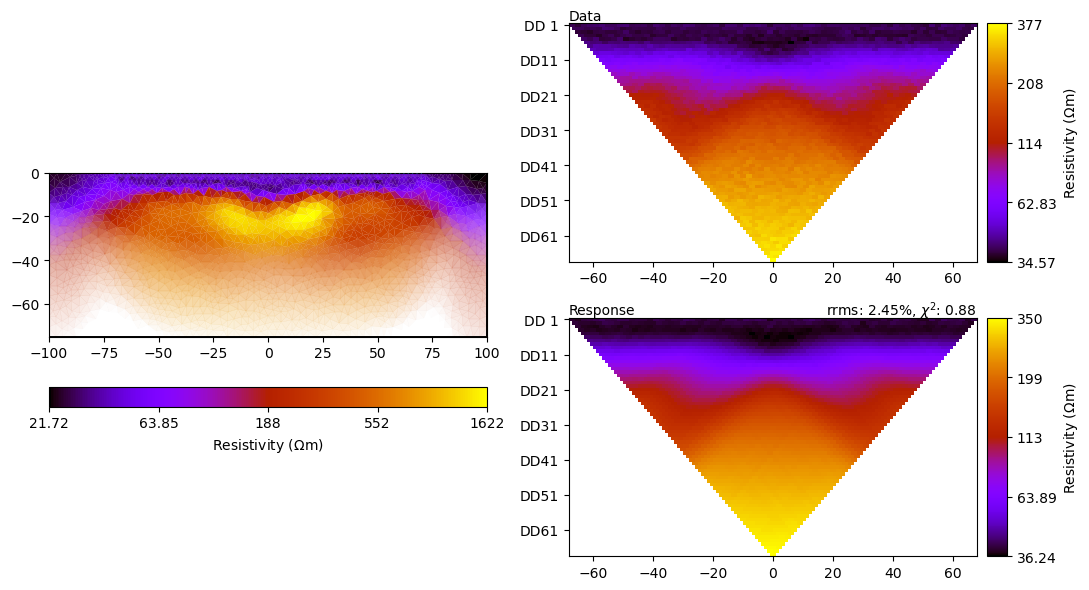

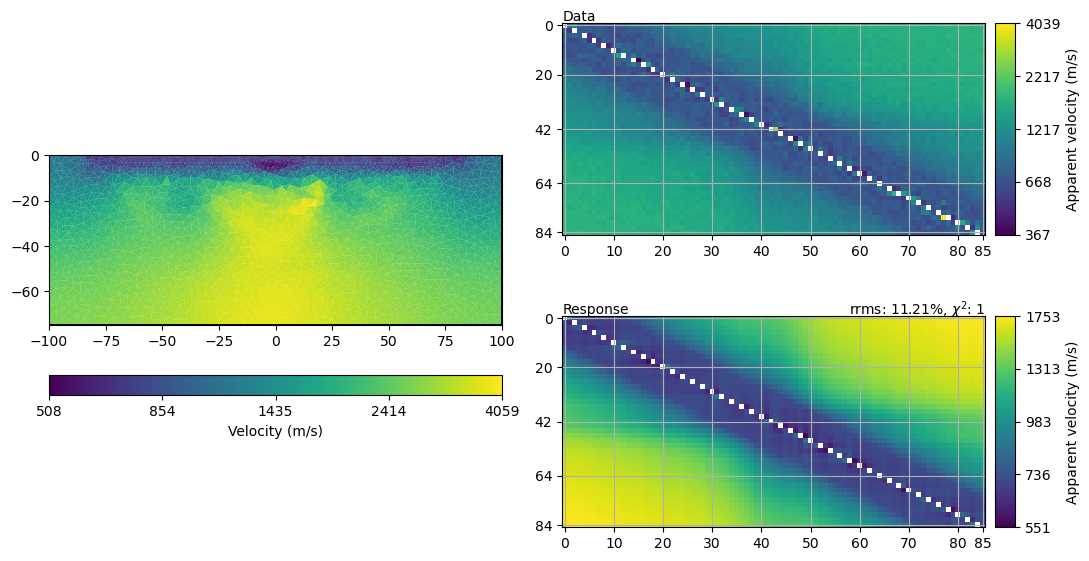

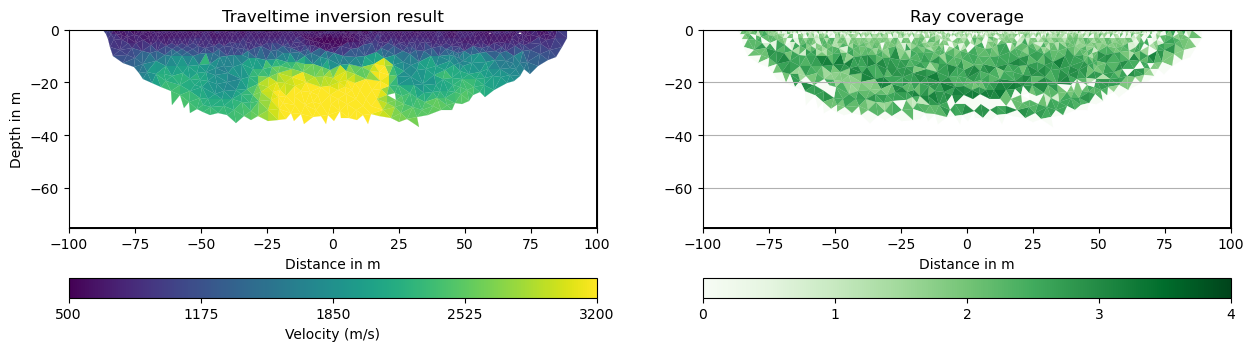

In [32]:
v_est_con = SRT.invert(tt_data, mesh=invmesh, vTop=500, vBottom=3500, lam=5, secNodes=1, verbose=True, maxIter=30)
r_est_con = ERT.invert(ert_data, mesh = extmesh, lam=2, verbose=True)

# Display results
ERT.showResultAndFit(cMap=c_ert)
SRT.showResultAndFit(cMap=c_srt)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
SRT.showResult(logScale=False, cMin=lim_srt[0], cMax=lim_srt[1], ax=ax1, coverage=SRT.standardizedCoverage())
ax1.set_ylim(-75,0)
ax1.set_title('Traveltime inversion result')
ax1.set_xlabel('Distance in m')
ax1.set_ylabel('Depth in m')



SRT.showCoverage(ax=ax2, cMap="Greens", cMin=0, cMax=4, colorBar=True)
ax2.set_ylim(-75,0)
ax2.grid(axis='y')
ax2.set_title('Ray coverage')
ax2.set_xlabel('Distance in m')

Text(0.5, 1.15, '    Conventional smoothness-constrained inversion')

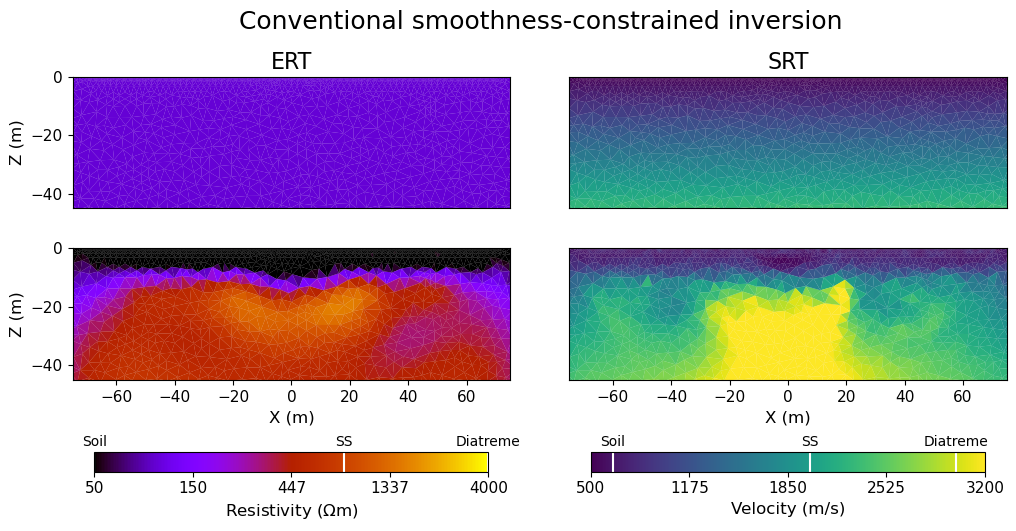

In [33]:
v_start = 1/SRT.inv.startModel
r_start = ERT.inv.startModel

fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, [r_start, r_est_con], [v_start, v_est_con],
                               c_ert, c_srt, lim_ert, lim_srt, label_list=['Start model', 'Result'], labels=False,
                               ert_marks=ert_marks, srt_marks=srt_marks, 
                               ert_label=ert_label, srt_label=srt_label, marks=True,
                               figsize=(10,3.5),xlim=[-75,75],ylim=[-45,0])

ax[0,0].set_title('ERT', fontsize=16)
ax[0,1].set_title('SRT', fontsize=16)

fig.suptitle(f'    Conventional smoothness-constrained inversion',fontsize=18, y=1.15)

# Order q=1

In [45]:
q=1
beta = 1e-10

lam_ert = 1e-2
a_ert = 30

lam_srt = 5e-2
a_srt = 30

## ME

19/04/24 - 11:33:07 - pyGIMLi - INFO - Found 2 regions.
19/04/24 - 11:33:07 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
19/04/24 - 11:33:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/04/24 - 11:33:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
19/04/24 - 11:33:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11183 Cells: 21408 Boundaries: 16534


Starting Iteration 0...
... ERT


19/04/24 - 11:33:07 - pyGIMLi - INFO - Use median(data values)=99.7039288434914
19/04/24 - 11:33:07 - pyGIMLi - INFO - Created startmodel from forward operator: 4627 [99.7039288434914,...,99.7039288434914]


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 27.27
#####     stabilizing functional    S = 2.22
#####     joint weighted misfit chi^2 = 27.27
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 3.63
#####     stabilizing functional    S = 6.60
#####     joint weighted misfit chi^2 = 3.63
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 2.51
#####     stabilizing functional    S = 19.15
#####     joint weighted misfit chi^2 = 2.51
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.82
#####     stabilizing functional    S = 

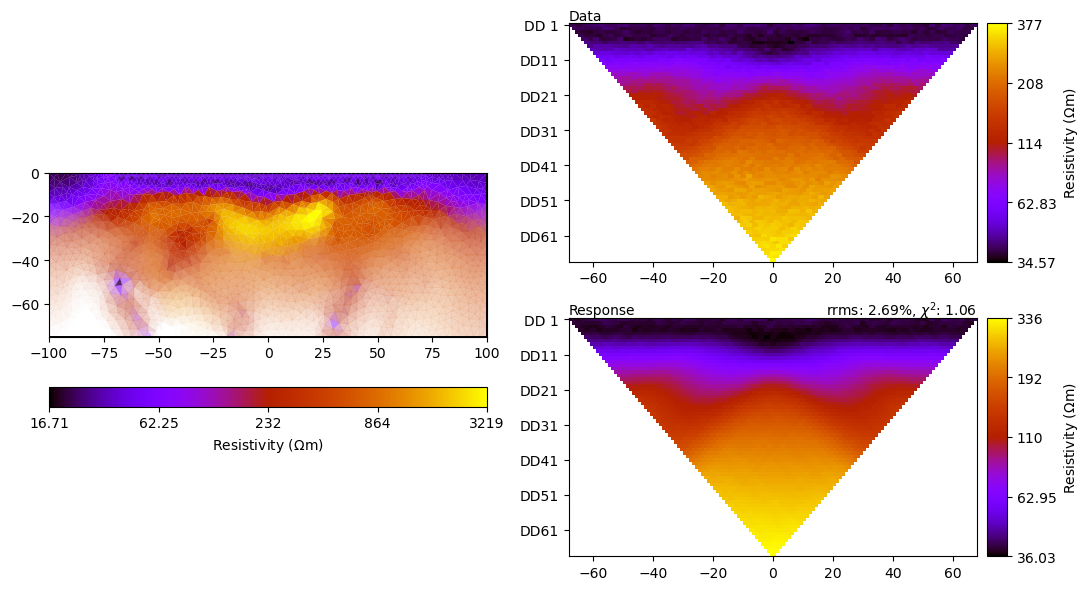

In [46]:
# ERT
a = a_ert
lam = lam_ert
beta = beta

ERT2 = ert.ERTManager(ert_data)
Je = JEI(mgr_list=[ERT2], data_list=[ert_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a)

KWe = dict(lam=lam, verbose=False)
Je.setKWInv([KWe])
Je.setNames(['ERT'])
Je.setMethodMesh(extmesh, 0)
Je.setReferenceModel([refmod_ert])

Je.runInversion('ME', maxIter=10, chi_limit=1)
ERT2.showResultAndFit(cMap=c_ert)

[r_est_me] = Je.getModels()


19/04/24 - 11:36:41 - pyGIMLi - INFO - Found 1 regions.
19/04/24 - 11:36:41 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/04/24 - 11:36:42 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
19/04/24 - 11:36:42 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
19/04/24 - 11:36:42 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00173466 0.00197157 0.00196475 ... 0.00022427 0.00022431 0.00051822]


Starting Iteration 0...
... SRT
Starting iteration 1...
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 2.71
#####     stabilizing functional    S = 15.82
#####     joint weighted misfit chi^2 = 2.71
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 2.59
#####     stabilizing functional    S = 4.96
#####     joint weighted misfit chi^2 = 2.59
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 2.12
#####     stabilizing functional    S = 85.25
#####     joint weighted misfit chi^2 = 2.12
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 1.88
#####    

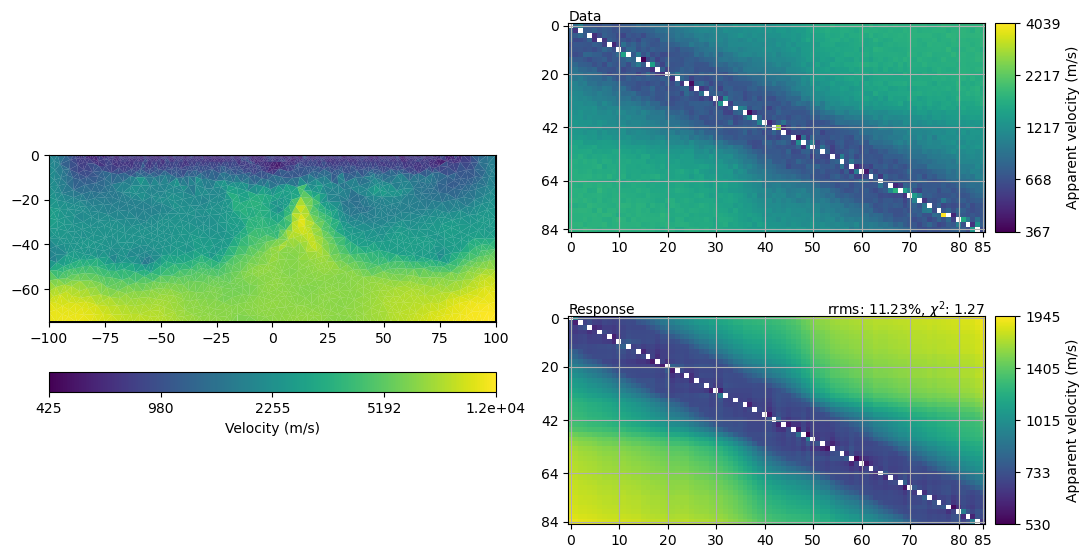

In [47]:
# SRT
a = a_srt
lam = lam_srt
beta = beta

SRT2 = TravelTimeManager(tt_data)
Js = JEI(mgr_list=[SRT2], data_list=[tt_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a)

KWs = dict(lam=lam, verbose=False, vTop=500, vBottom=4500, secNodes=1)
Js.setKWInv([KWs])
Js.setNames(['SRT'])

Js.setReferenceModel([refmod_srt])

Js.runInversion('ME', maxIter=20, chi_limit=1)
SRT2.inv.model = 1/SRT2.inv.model
SRT2.showResultAndFit(cMap=c_srt)

[v_est_me] = Js.getModels()

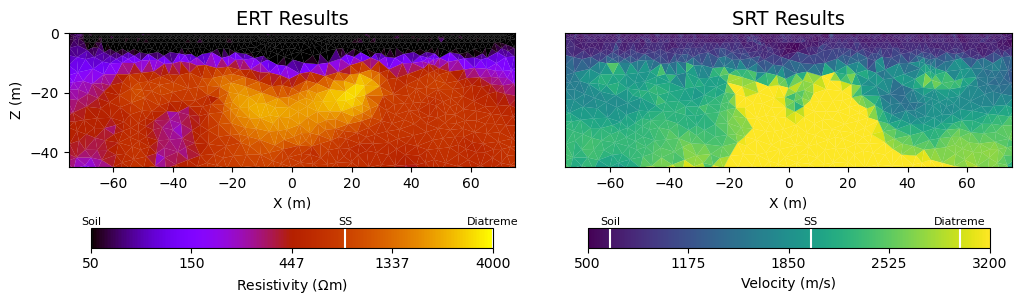

In [48]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, [r_est_me],  [v_est_me], 
                                                   c_ert, c_srt, lim_ert, lim_srt, ['no Sens'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True, xlim=[-75,75],ylim=[-45,0])

## JME

19/04/24 - 11:41:13 - pyGIMLi - INFO - Found 2 regions.
19/04/24 - 11:41:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
19/04/24 - 11:41:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/04/24 - 11:41:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
19/04/24 - 11:41:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11183 Cells: 21408 Boundaries: 16534


Starting Iteration 0...
... ERT


19/04/24 - 11:41:13 - pyGIMLi - INFO - Use median(data values)=99.7039288434914
19/04/24 - 11:41:13 - pyGIMLi - INFO - Created startmodel from forward operator: 4627 [99.7039288434914,...,99.7039288434914]
19/04/24 - 11:41:39 - pyGIMLi - INFO - Found 1 regions.
19/04/24 - 11:41:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/04/24 - 11:41:39 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
19/04/24 - 11:41:39 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
19/04/24 - 11:41:39 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00173466 0.00197157 0.00196475 ... 0.00022427 0.00022431 0.00051822]


... SRT
Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=30
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 23.00
#####     SRT weighted misfit chi^2   = 3.10
#####     stabilizing functional    S = 3.12
#####     joint weighted misfit chi^2 = 26.09
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=30
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 3.21
#####     SRT weighted misfit chi^2   = 2.73
#####     stabilizing functional    S = 6.95
#####     joint weighted misfit chi^2 = 5.94
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=30
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 2.17
#####     SRT weighted misfit chi^2   = 2.33
#####     stabilizing fu

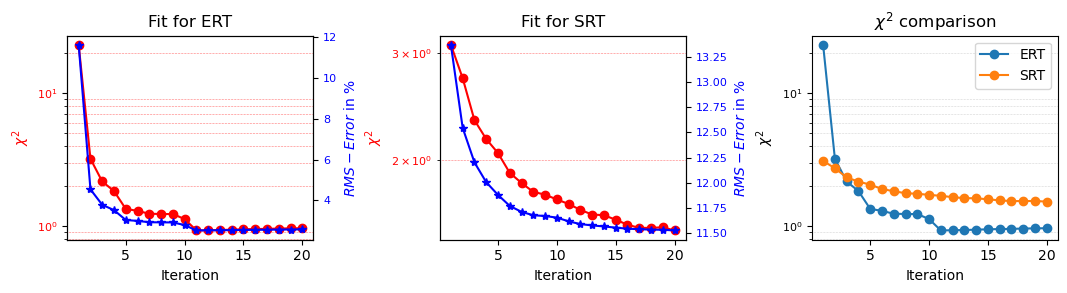

In [49]:
# Without weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 1 # weight srt

ERT3 = ert.ERTManager(ert_data)
SRT3 = TravelTimeManager(tt_data)
J1 = JEI(mgr_list=[ERT3,SRT3], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=4500, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J1.setMethodMesh(extmesh, 0)
J1.setKWInv([KWe, KWs])
J1.setNames(['ERT','SRT'])
J1.setMethodWeights([w1,w2])
J1.setReferenceModel([refmod_ert,refmod_srt])

J1.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jme, v_est_jme] = J1.getModels()
    
J1.plotFitHistory()

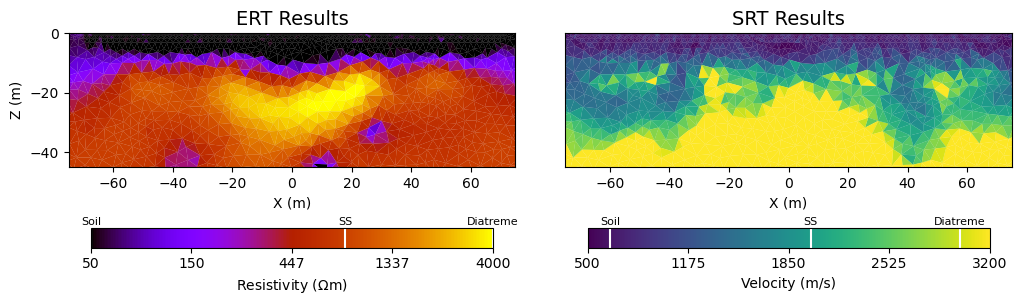

In [50]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, [r_est_jme],  [v_est_jme], 
                                                   c_ert, c_srt, lim_ert, lim_srt, ['no Sens'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True, xlim=[-75,75],ylim=[-45,0])

19/04/24 - 12:02:03 - pyGIMLi - INFO - Found 2 regions.
19/04/24 - 12:02:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
19/04/24 - 12:02:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/04/24 - 12:02:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
19/04/24 - 12:02:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11183 Cells: 21408 Boundaries: 16534


Starting Iteration 0...
... ERT


19/04/24 - 12:02:04 - pyGIMLi - INFO - Use median(data values)=99.7039288434914
19/04/24 - 12:02:04 - pyGIMLi - INFO - Created startmodel from forward operator: 4627 [99.7039288434914,...,99.7039288434914]
19/04/24 - 12:02:31 - pyGIMLi - INFO - Found 1 regions.
19/04/24 - 12:02:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
19/04/24 - 12:02:31 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
19/04/24 - 12:02:31 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
19/04/24 - 12:02:31 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00173466 0.00197157 0.00196475 ... 0.00022427 0.00022431 0.00051822]


... SRT
Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=30
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 20.86
#####     SRT weighted misfit chi^2   = 2.58
#####     stabilizing functional    S = 9.02
#####     joint weighted misfit chi^2 = 23.44
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=30
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 5.39
#####     SRT weighted misfit chi^2   = 2.19
#####     stabilizing functional    S = 11.15
#####     joint weighted misfit chi^2 = 7.58
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=30
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.88
#####     SRT weighted misfit chi^2   = 1.99
#####     stabilizing f

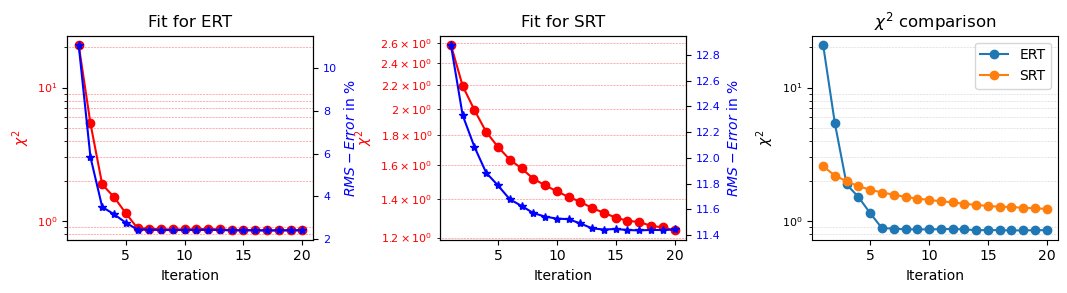

In [51]:
# With weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 10 # weight srt

ERT4 = ert.ERTManager(ert_data)
SRT4 = TravelTimeManager(tt_data)
J2 = JEI(mgr_list=[ERT4,SRT4], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=4500, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J2.setMethodMesh(extmesh, 0)
J2.setKWInv([KWe, KWs])
J2.setNames(['ERT','SRT'])
J2.setMethodWeights([w1,w2])
J2.setReferenceModel([refmod_ert,refmod_srt])

J2.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jmew, v_est_jmew] = J2.getModels()

J2.plotFitHistory()

## Comparison Results

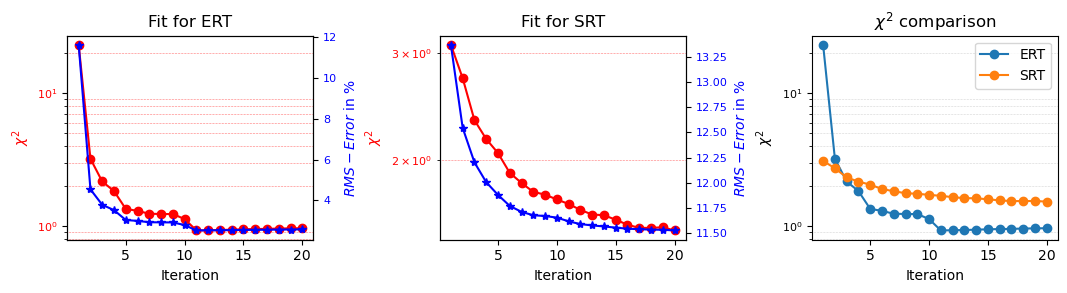

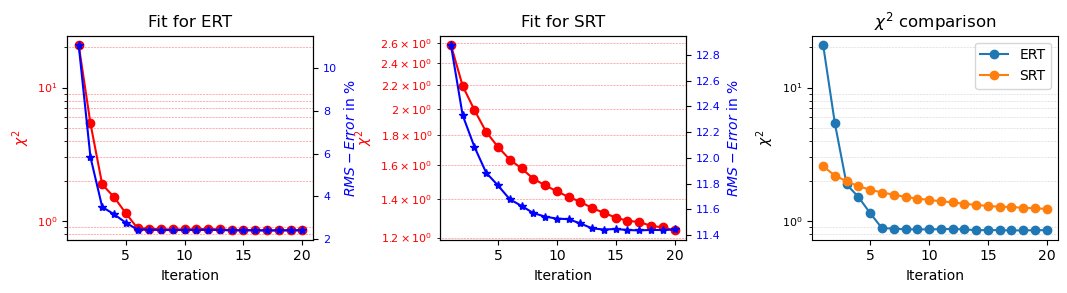

In [52]:
J1.plotFitHistory()
# plt.savefig(path+f'Figures/Ch-3/Conv_JME_{q}.pdf', bbox_inches='tight',dpi=600)
J2.plotFitHistory()
# plt.savefig(path+f'Figures/Ch-3/Conv_JMEweighted_{q}.pdf', bbox_inches='tight',dpi=600)

In [53]:
world = mt.createWorld([-100,-75], [100, 0], layers=[-8])

# Create surface points for Diatreme
pnts = [[-30,-23], [-20,-8], [0,-12], [20,-8], [30,-23]]
top = mt.createPolygon(pnts, addNodes=5, interpolate="spline")
left = mt.createLine([-25,world.ymin()], pnts[0])
right = mt.createLine([25,world.ymin()], pnts[-1])

# Combine Diatreme and layered subsurface
geom = world + top + left + right

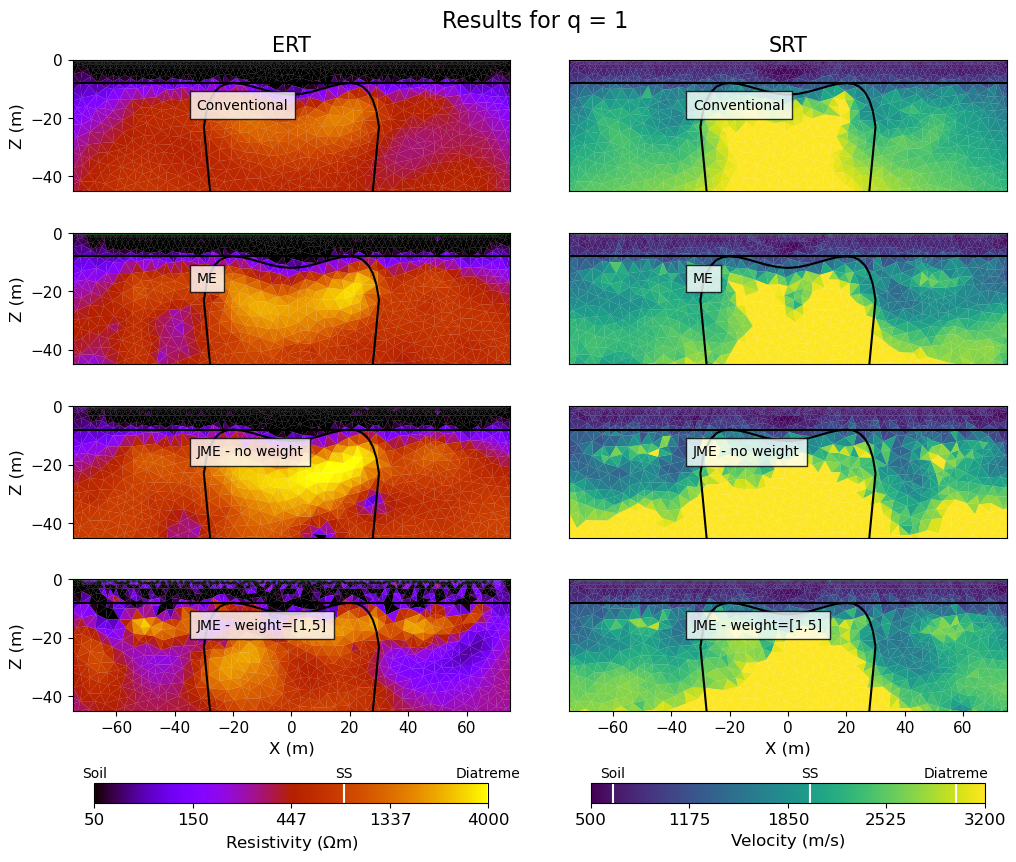

In [54]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, 
                                                   [r_est_con, r_est_me,r_est_jme,r_est_jmew], 
                                                   [v_est_con, v_est_me,v_est_jme,1/v_est_jmew], 
                                                   c_ert, c_srt, lim_ert, lim_srt, 
                                                   ['Conventional','ME','JME - no weight','JME - weight=[1,5]'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True, xlim=[-75,75],ylim=[-45,0],
                                                   figsize=(10,7))
for axis_ar in ax:
    for axis in axis_ar:
        pg.viewer.mpl.drawPLC(axis, geom, fillRegion=False)
        axis.set_xlim([-75,75])
        axis.set_ylim([-45,0])
fig.suptitle(f'Results for q = {q}',fontsize=16, x=0.51, y=1.05)
ax[0,0].set_title('ERT',fontsize=15)
ax[0,1].set_title('SRT',fontsize=15)
for a in ax[:,0]:
    a.set_ylabel('Z (m)', fontsize=12)

for a in ax[-1,:]:
    a.set_xlabel('X (m)', fontsize=12)

    
cax2.set_xlabel(pg.unit('vel'), fontsize=12)
cax1.tick_params(labelsize=12)
cax1.set_xlabel(pg.unit('res'), fontsize=12)
cax2.tick_params(labelsize=12)

# plt.savefig(path+f'Figures/Ch-3/Best_results_comp_{q}.pdf', bbox_inches='tight', dpi=600)

## Comparison Misfit

Text(0.5, 0, 'Sensor Index')

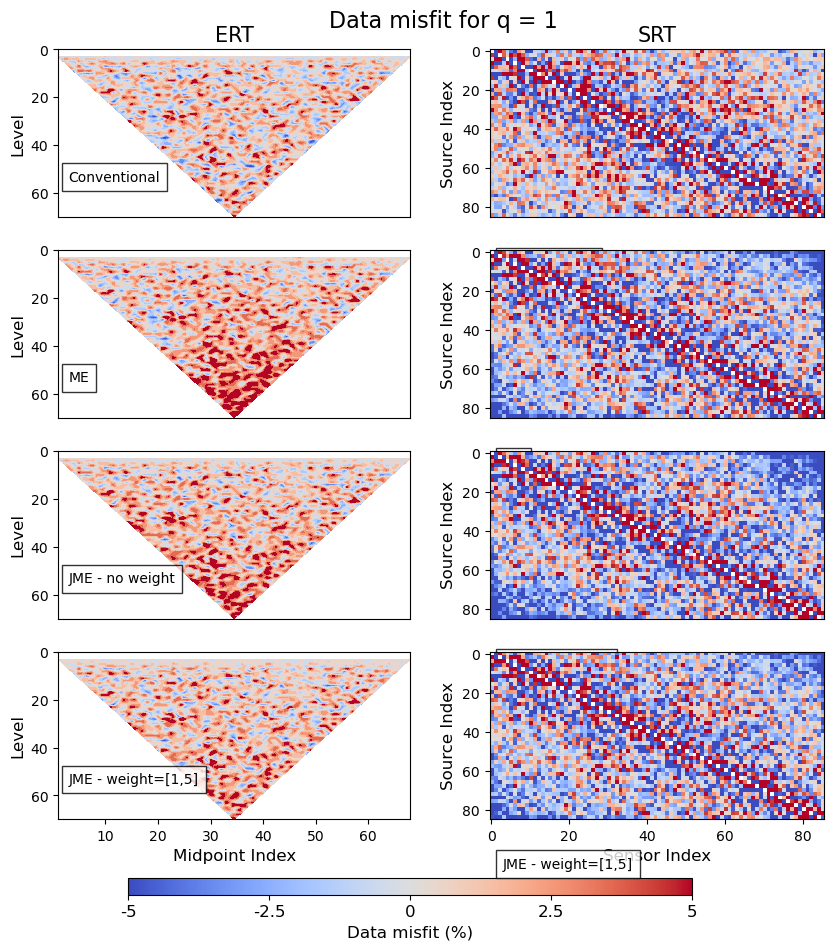

In [55]:
lim = [-5,5] # Misfit limits
label_list = ['Conventional','ME','JME - no weight','JME - weight=[1,5]']
srt_mgrs = [SRT,SRT2,SRT3,SRT4]
ert_resp = [m.inv.response.array() for m in [ERT,ERT2,ERT3,ERT4]]

cmap='coolwarm'

fig, ax = plt.subplots(4,2, figsize=(10,10))

for i in range(4):
    # Plot misfits
    e_misfit =  100*(ert_data['rhoa'].array()-ert_resp[i])/ert_data['rhoa'].array()
    showPseudosections(ert_data, e_misfit, [0,len(ert_data['a'])], 1, ax=ax[i,0], clim=lim, cmap=cmap, Type='misfit', 
                       annotation=False, colorBar=False)
    
    showTTMatrix(srt_mgrs[i], 'misfit', ax[i,1], lim=lim, cmap=cmap, colorBar=False)
    
    # Add labels
    for axis in [ax[i,0],ax[i,1]]:
        axis.text(3, 55, label_list[i], fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

# Adjust axes
for ax_ar in ax[:-1,:]:
    for axis in ax_ar:
        axis.set_xticks([])  
        axis.set_xlabel('')

# Add colorbar
cax = ax[-1,0].inset_axes([0.2, -0.45, 1.6, 0.1])
createColorBarOnly(ax=cax, cMin=lim[0], cMax=lim[1], logScale=False,cMap=cmap,
                   label='Data misfit (%)', orientation='horizontal')
cax.set_xlabel('Data misfit (%)', fontsize=12)
cax.tick_params(labelsize=12)

fig.suptitle(f'Data misfit for q = {q}',fontsize=16, x=.51, y=.92)
ax[0,0].set_title('ERT',fontsize=15)
ax[0,1].set_title('SRT',fontsize=15)

for a in ax[:,0]:
    a.set_ylabel('Level', fontsize=12)
    a.set_yticks([0,20,40,60])
    
for a in ax[:,1]:
    a.set_ylabel('Source Index', fontsize=12)
    
ax[-1,0].set_xlabel('Midpoint Index', fontsize=12)
ax[-1,1].set_xlabel('Sensor Index', fontsize=12)
# plt.savefig(path+f'Figures/Ch-3/Best_misfit_comp_{q}.pdf', bbox_inches='tight',dpi=600)